### **1. CRISP-DM**

#### 1.1 O que é o CRISP-DM?

CRISP-DM é a sigla em inglês para o Cross Industry Standard Process for Data Mining. É uma metodologia amplamente utilizada para o processo de mineração de dados. O objetivo do CRISP-DM é fornecer uma abordagem estruturada para solucionar problemas de negócios usando técnicas de mineração de dados.

#### 1.2 Etapas do CRISP-DM.

<img src= 'Imagens\CRISP-DM_Process_Diagram.png'>

1. Compreender o Problema: nesta etapa, o objetivo é compreender o problema de negócio a ser resolvido e definir objetivos claros para o projeto de mineração de dados.

2. Coletar Dados: nesta etapa, os dados relevantes são coletados e preparados para o uso. Isso inclui a identificação de fontes de dados, a aquisição de dados e a verificação da qualidade dos dados.

3. Preparar Dados: nesta etapa, os dados coletados são limpos, integrados e transformados de forma a prepará-los para a modelagem.

4. Modelar Dados: nesta etapa, os dados são modelados usando técnicas de mineração de dados, como análise de cluster, classificação, regressão, etc., com o objetivo de identificar padrões e relações importantes.

5. Avaliar Resultados: nesta etapa, os resultados da modelagem são avaliados quanto à sua qualidade e adequação para atender aos objetivos definidos na etapa 1.

6. Implementar Soluções: nesta etapa, as soluções derivadas da modelagem são implementadas e monitoradas para avaliar seu impacto nos negócios.

## **2. Business Understanding**

#### 2.1 House Prices - Advanced Regression Techniques

O desafio House Prices - Advanced Regression é um problema de previsão de preços de imóveis. O objetivo é utilizar as características dos imóveis para prever seus preços de venda. O conjunto de dados inclui informações descritivas sobre a localização e as características de cada imóvel, bem como seu preço de venda. Este desafio é uma oportunidade para aplicar técnicas de regressão avançadas e explorar as relações entre as variáveis para melhor entender os preços de imóveis. Os resultados podem ser úteis para empresas imobiliárias, construtoras e compradores/vendedores de imóveis ao fornecer uma avaliação mais precisa do valor de um imóvel.

#### 2.2 O mercado de imóveis

O mercado imobiliário é uma indústria global que movimenta bilhões de dólares por ano. A precisão na avaliação de um imóvel é importante para compradores, vendedores e investidores. Antigamente, a avaliação era baseada em fatores como localização, qualidade da construção e características do imóvel, mas hoje, usamos técnicas de machine learning para tornar a avaliação mais precisa. O modelo de machine learning processa grandes quantidades de dados sobre imóveis e seus preços para identificar padrões e prever o valor de uma casa. Isso ajuda a minimizar a subjetividade na avaliação e fornecer uma visão objetiva e baseada em dados. 

## **3. Data Understanding**

#### 3.1 Carregamento da biblioteca e dos dados

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stats
from IPython.display            import Markdown
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, IsolationForest
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from skopt import gp_minimize
from sklearn.feature_selection import SelectKBest, chi2
from category_encoders import TargetEncoder
import joblib
%matplotlib inline

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

In [35]:
import streamlit as st

In [36]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [37]:
# Função para auxiliar a análise. 
def df_informations(df):
    df_info = pd.DataFrame({'Not Null': df.notnull().count(),
                'Null': df.isnull().sum(),
                'Perce Null': df.isnull().mean(),
                'Unique': df.nunique(),
                'Dtype': df.dtypes
                })

    df_dtype = pd.DataFrame(df_info['Dtype'].value_counts())
    df_dtype['Perce'] = round(df_dtype['Dtype'] / df_dtype['Dtype'].sum(), 2)

    text = f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns. From these, we have:'

    df_info = df_info.style.background_gradient(cmap='jet', subset=['Perce Null']).format({'Perce Null': '{:.2%}'})
    df_dtype = df_dtype.style.background_gradient(cmap='YlGn', subset=['Perce']).format({'Perce': '{:.2%}'})

    display(Markdown("<H3 style='text-align:left;float:lfet;'>Information about the Dataset"))
    display(Markdown(f'<H5> {text}'))
    display(df_info)
    display(Markdown("<H3 style='text-align:left;float:lfet;'>About Dtypes we have:"))
    display(df_dtype)


# Essa função irá aplicar todo o tratamento realizado no dado de treino também no dado de teste.


#### 3.2 Conhecendo os dados

In [38]:
print(f'O nosso dataset possui {data.shape[1]} colunas e {data.shape[0]} linhas.')

O nosso dataset possui 81 colunas e 1460 linhas.


In [39]:
''' Utilizaremos o display para conhecer as colunas e verificar o comportamento dos dados.'''
display(data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [40]:
''' Com a função describe iremos conhecer como está a distribuição dos dados, no describe gosto de incluir o 1% e 99% pois consigo observar se existe uma diferença muito grande desses valores para o min e max podendo assim já ter uma noção sobre a presença de outliers.'''
data.describe(percentiles=[0.01, 0.2, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,20%,50%,75%,90%,99%,max
Id,1460.0,730.500000,421.610009,1.0,15.59,292.8,730.5,1095.25,1314.1,1445.41,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,20.0,50.0,70.00,120.0,190.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,21.00,53.0,69.0,80.00,96.0,141.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,1680.00,7078.4,9478.5,11601.50,14381.7,37567.64,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,3.00,5.0,6.0,7.00,8.0,10.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,3.00,5.0,5.0,6.00,7.0,9.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1899.18,1947.8,1973.0,2000.00,2006.0,2009.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1950.00,1961.8,1994.0,2004.00,2006.0,2009.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,0.0,166.00,335.0,791.92,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,0.0,383.5,712.25,1065.5,1572.41,5644.0


In [41]:
''' Utilizaremos a função criada para ter uma visão mais completa dos dados.'''
df_informations(data)

<H3 style='text-align:left;float:lfet;'>Information about the Dataset

<H5> Dataset has 1460 rows and 81 columns. From these, we have:

,Not Null,Null,Perce Null,Unique,Dtype
Id,1460,0,0.00%,1460,int64
MSSubClass,1460,0,0.00%,15,int64
MSZoning,1460,0,0.00%,5,object
LotFrontage,1460,259,17.74%,110,float64
LotArea,1460,0,0.00%,1073,int64
Street,1460,0,0.00%,2,object
Alley,1460,1369,93.77%,2,object
LotShape,1460,0,0.00%,4,object
LandContour,1460,0,0.00%,4,object
Utilities,1460,0,0.00%,2,object


<H3 style='text-align:left;float:lfet;'>About Dtypes we have:

,Dtype,Perce
object,43,53.00%
int64,35,43.00%
float64,3,4.00%


#### 3.3 Conclusão do Data Understanding

Com o proceso do data understanding conseguimos notar a presença de diversas colunas com valores nulos, iremos verificar mais de perto para realizar o tratamento adequado, além de que com a função describe conseguimos notar também que algumas colunas possuem presenças de outliers, esses valores iremos verificar e tentar tratar mais a frente.

## **4. Data Preparation**

In [42]:
''' O nosso dataframe possui uma coluna ID, porém como se trata de uma coluna index e o Python já possui um index iremos remove-la.'''
data.drop(columns=['Id'], inplace=True)

#### 4.1 Tratamento dos nulos

In [43]:
# Coluna LotFrontage - A largura linear da rua conectada à propriedade.

data['LotFrontage'].describe()

# Como podemos ver no describe o LotFrontage não tem uma dispersão tão grande dos dados, sendo assim irei preencher os valores nulos com a média. 
LotFrontage_Fillna = data['LotFrontage'].mean()
data['LotFrontage'].fillna(LotFrontage_Fillna, inplace=True)

In [44]:
# Coluna Alley - Tipo de acesso ao beco da propriedade.

# Dentro do dicionário da coluna Alley é informado que os valores NA são as propriedades que não possuem acesso ao beco, sendo assim iremos preencher os valores nulos dessa coluna como 'None'.

data['Alley'].fillna('None', inplace= True)

In [45]:
# Coluna MasVnrType e MasVnrArea
# Observando a colunas podemos ver que em sua maioria os valores da MasVnrType são None e em caso de None o MasVnrAreas é = 0, devido a isso iremos preencher dessa forma os nulos. 
data['MasVnrType'].fillna('None', inplace=True)
data['MasVnrArea'].fillna(0, inplace=True)

In [46]:
# Coluna BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 e BsmtFinType2
# Dentro do dicionário dessas colunas é informado que os valores NA são as propriedades que não possuem porão, sendo assim iremos preencher os valores nulos dessa coluna como 'None'.

data['BsmtQual'].fillna('None', inplace=True)
data['BsmtCond'].fillna('None', inplace=True)
data['BsmtExposure'].fillna('None', inplace=True)
data['BsmtFinType1'].fillna('None', inplace=True)
data['BsmtFinType2'].fillna('None', inplace=True)

In [47]:
# Coluna Electrical - Sistema Eletrico 
# Como a coluna Electrical possui somente um valor nulo e não temos referencial de como preenche-lo iremos preencher com o SBrkr que refere-se ao Standard Circuit Breakers & Romex por se tratar do valor mais presente.

data['Electrical'].fillna('SBrkr', inplace=True)

In [48]:
# Coluna FireplaceQu - Qualidade da lareira.

# Dentro do dicionário dos dados informa que os valores nulos refere-se as casas que não possuem lareira, sendo assim preencheremos como 'None' esse valores.

data['FireplaceQu'].fillna('None', inplace=True)

In [49]:
# Colunas GarageType, GarageYrBlt, GarageFinish, GarageQual e GarageCond.
# Dentro dos dicionários é informado que os valores nulos refere-se as casas que não possuem garagem, sendo assim preencheremos como 'None' esses valores.

data['GarageType'].fillna('None', inplace=True)
data['GarageYrBlt'].fillna('None', inplace=True)
data['GarageFinish'].fillna('None', inplace=True)
data['GarageQual'].fillna('None', inplace=True)
data['GarageCond'].fillna('None', inplace=True)

In [50]:
# Coluna PoolQC.
# Os valores nulos refere-se as casas que não possuem piscina.

data['PoolQC'].fillna('None', inplace=True)

In [51]:
# Coluna Fence.
# Os valores nulos refere-se as casas que não possuem cerca. 

data['Fence'].fillna('None', inplace=True)

In [52]:
# Coluna MiscFeature.
# São casas que possuem recursos variados que não se encaixam em outras categorias, as linhas NaN refere-se as casas que não possuem esses recursos. 

data['MiscFeature'].fillna('None', inplace=True)

#### 4.2 Análise Gráfica

In [53]:
# As nossas colunas numéricas atualmente são 36 features, para uma melhor visualização e limpar as features que não irão ser úteis irei pegar somente as features que possuem alguma correlação com a variável target (SalePrice).
# Iremos também pegar a lista das colunas categoricas. 
col_numeric = list(data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']))
col_categ = list(data.select_dtypes(include='object'))

#### 4.3 Análise de Correlação

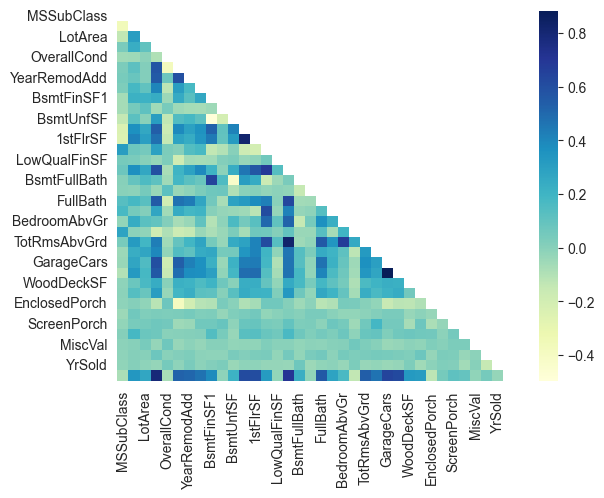

In [54]:
# Iremos começar com o gráfico de correlação para entender a relação das variáveis numéricas entre sí. 

data_corr = data[col_numeric].corr().transpose()
mask = np.triu(np.ones_like(data_corr))
sns.heatmap(data_corr,mask=mask, cmap='YlGnBu')
plt.show()

#### 4.4 Gráfico de distribuição

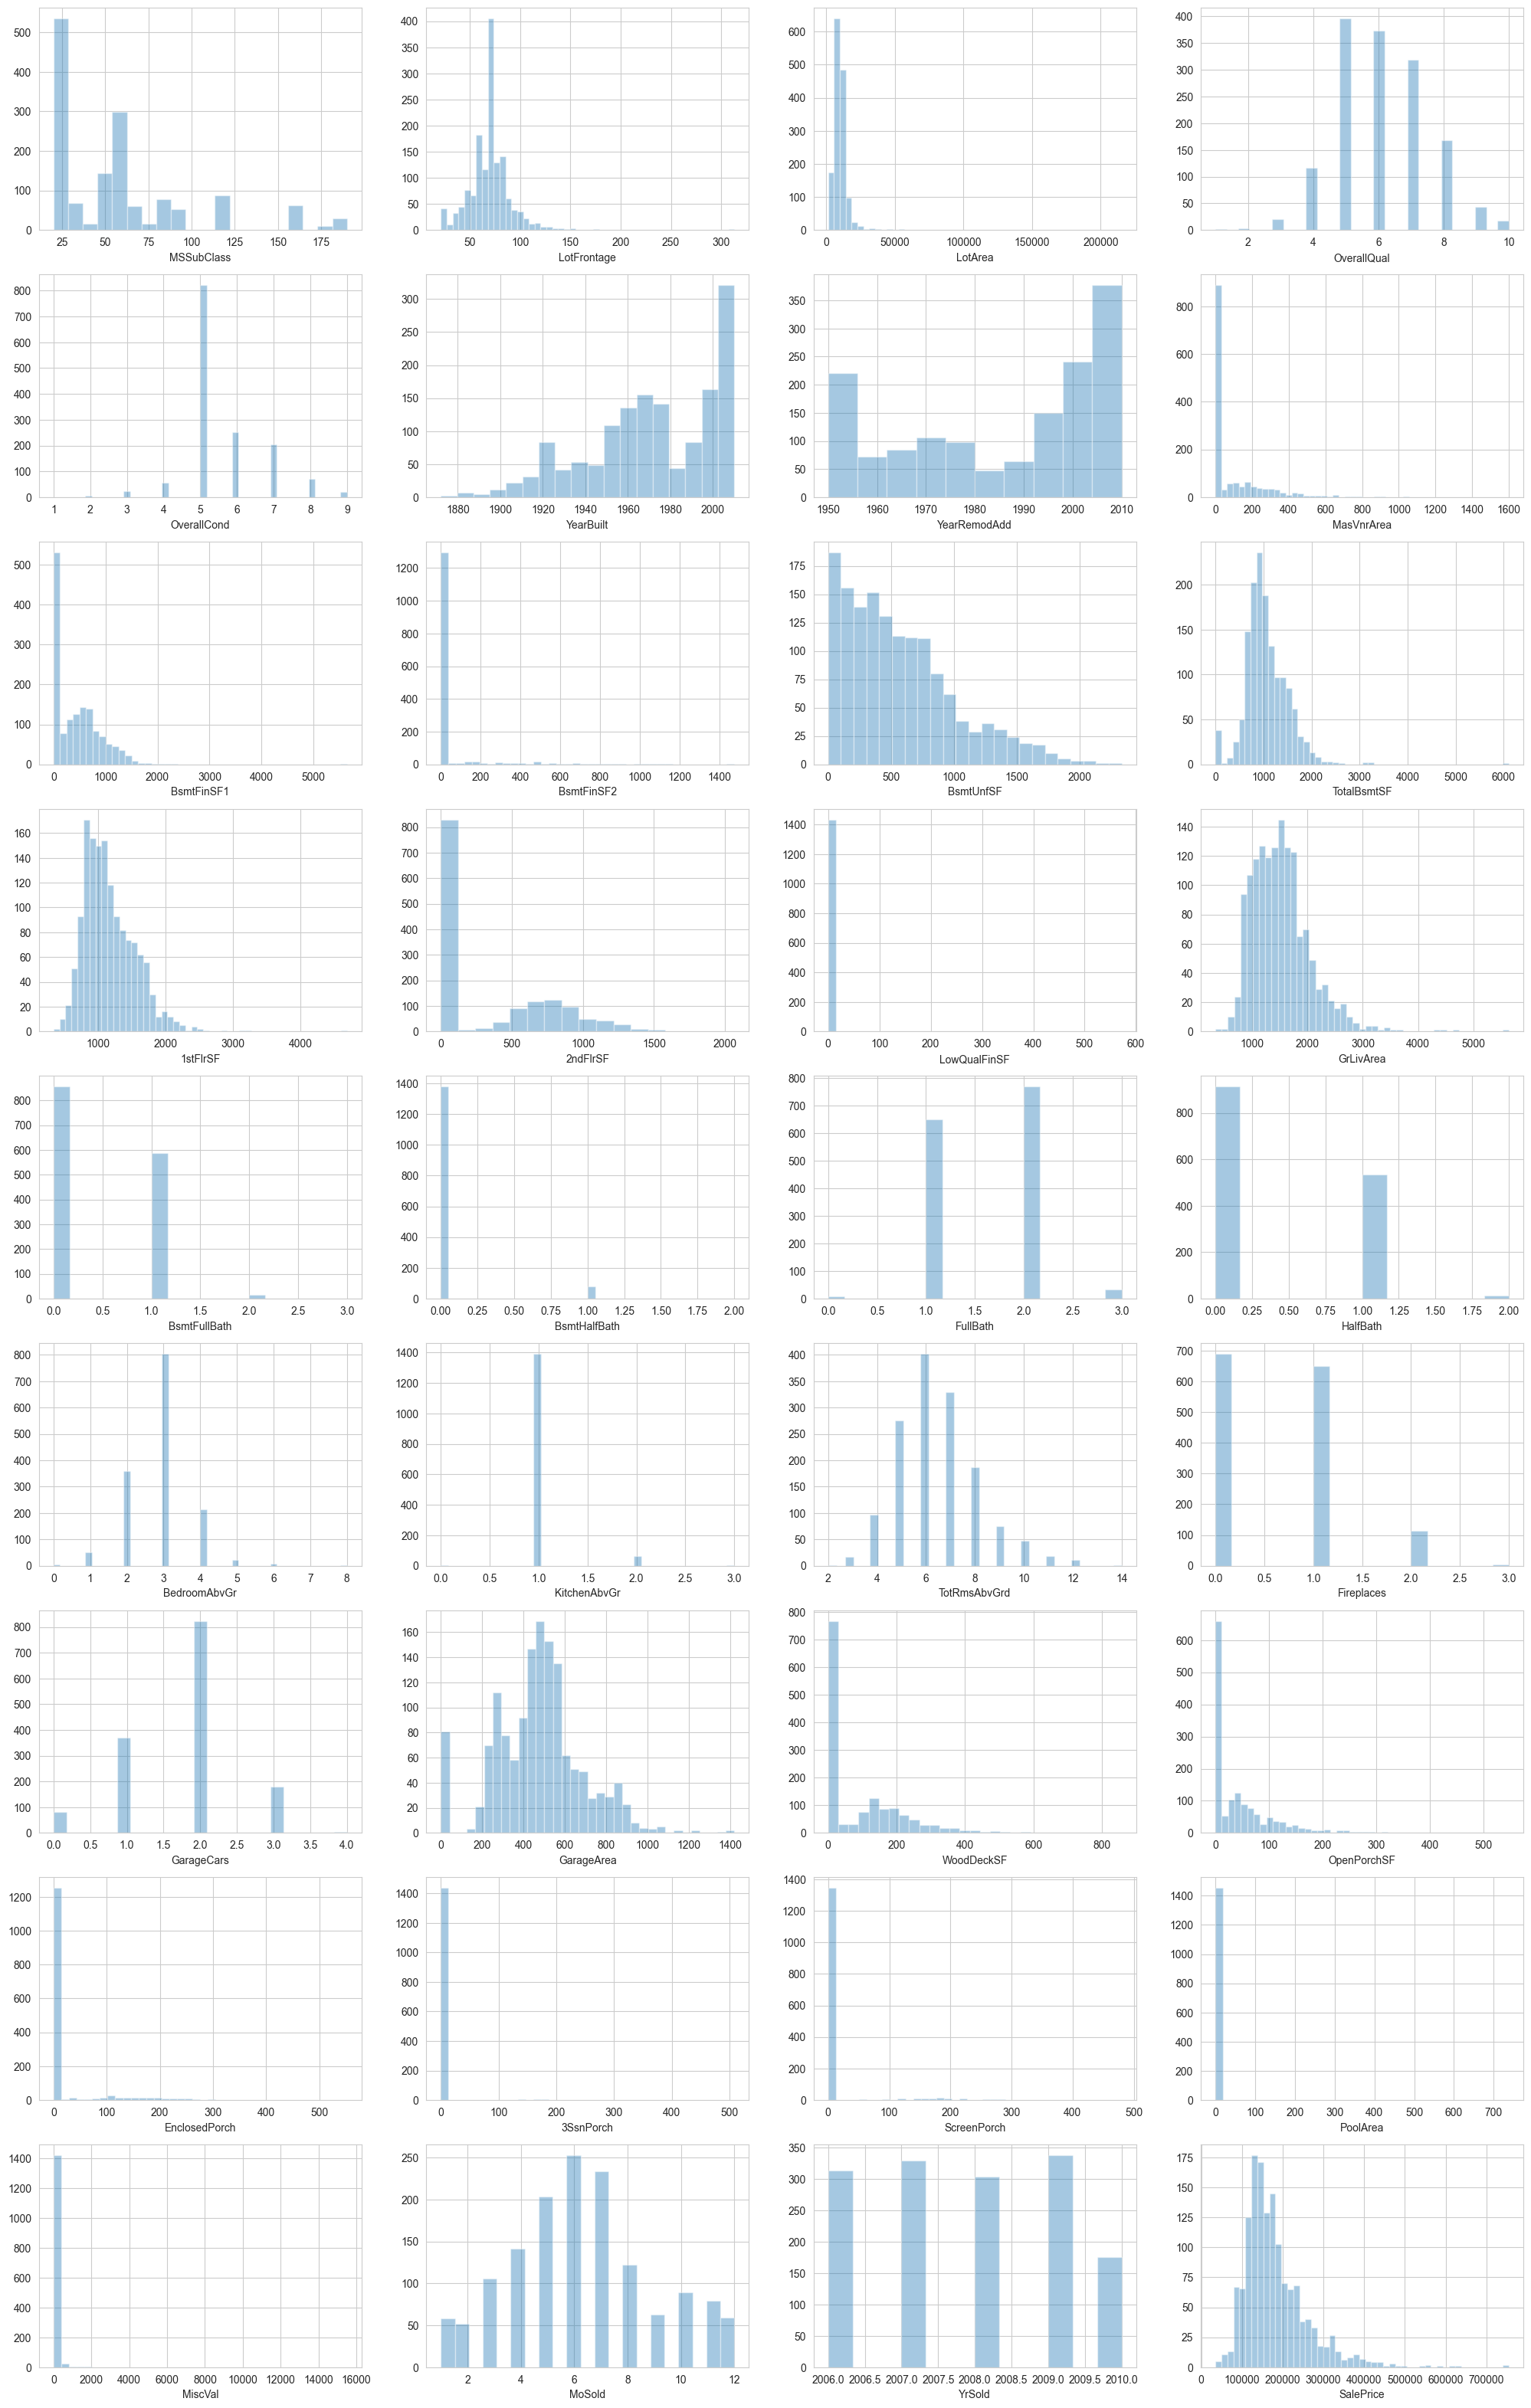

In [55]:
''' Utilizaremos o displot da biblioteca seaborn para verificar a distribuição dos dados.'''

figs, axs = plt.subplots(nrows=9, ncols=4, figsize=(25,40))
col = 0

for i in range(9):
    for j in range(4):
            sns.distplot(data[col_numeric[col]], kde=False, ax= axs[i][j])
            col = col+1

#### 4.5 Gráfico Ocorrências

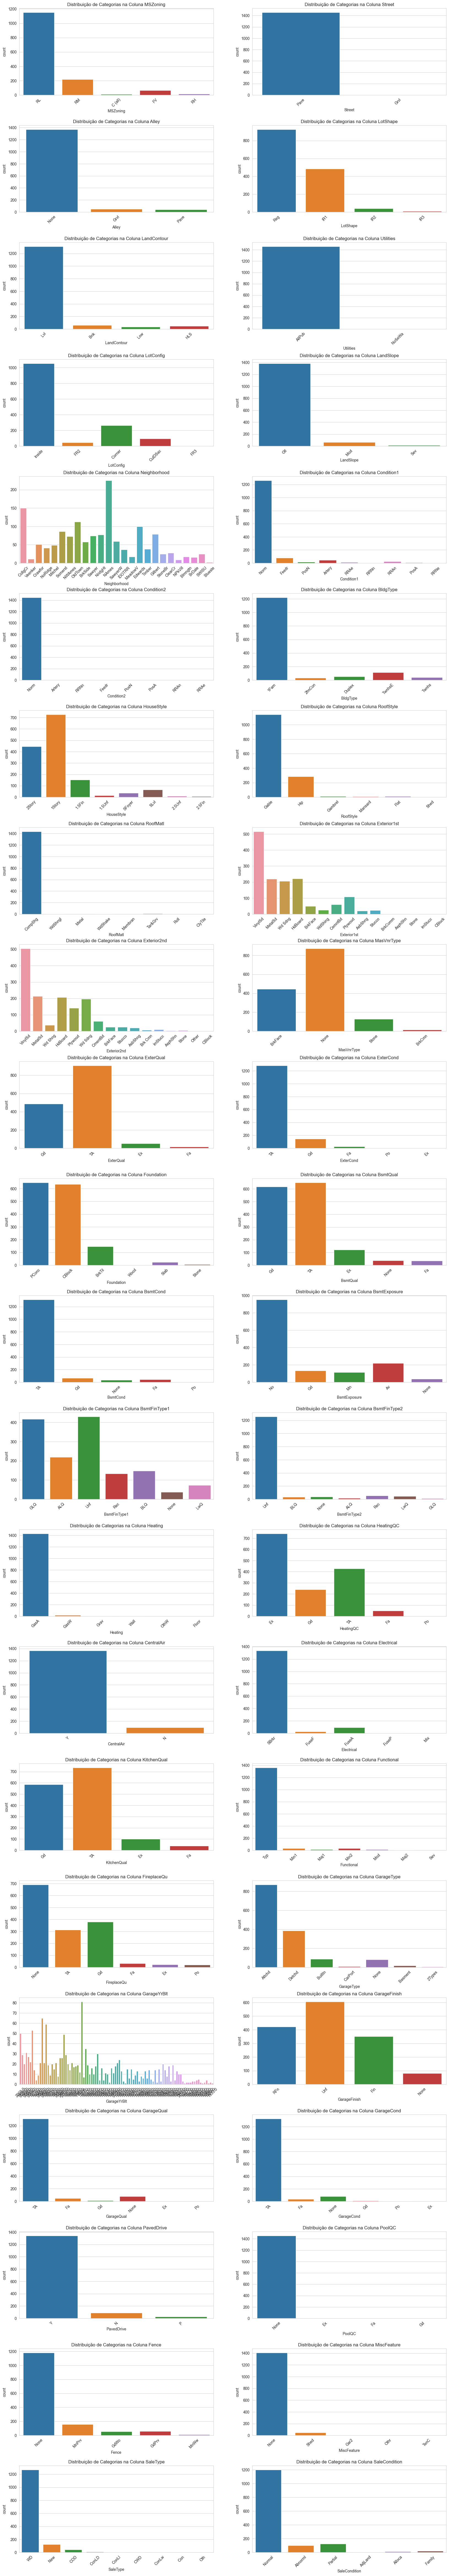

In [56]:
''' Utilizaremos o countplot do Seaborn para verificar a ocorrência dos dados categóricos.'''

# Definindo o número de linhas e colunas para o subplot
n_linhas = len(col_categ) // 2 + len(col_categ) % 2
n_colunas = 2

# Criando o objeto figure e as subplots
fig, axs = plt.subplots(n_linhas, n_colunas, figsize=(20, 120))
fig.subplots_adjust(hspace=0.35)

# For para o plot
for i, coluna in enumerate(col_categ):
    sns.countplot(data=data, x=coluna, ax=axs[i // n_colunas, i % n_colunas])
    axs[i // n_colunas, i % n_colunas].set_title("Distribuição de Categorias na Coluna " + coluna)

for i, ax in enumerate(axs.flatten()):
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Exiba o gráfico
plt.show()

In [57]:
''' Após a análise gráfico conseguimos ver que algumas variáveis não parecem ser tão importantes para o modelo, sendo assim iremos remove-las.'''

data.drop(columns=['GarageYrBlt', '1stFlrSF', '2ndFlrSF', 'MiscFeature' , 'PoolQC' , 'Heating' , 'Street' , 'Utilities' , 'RoofMatl' , 'Condition2', 'PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', '3SsnPorch', 'ScreenPorch', 'BsmtHalfBath'], inplace= True)

#### 4.6 Tratando os Outliers

In [58]:
col_ISO = list(data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']))

# Fit the Isolation Forest model
ISO_Model = IsolationForest(contamination=0.1)
ISO_Model.fit(data[col_ISO])

# Predict the outlier scores for each sample
scores = ISO_Model.decision_function(data[col_ISO])

# Mark the outliers with -1 and the inliers with 1
labels = np.where(scores > 0, 1, -1)

# Remove the outliers from the data
data = data[labels == 1]

#### 4.7 Normalizando os dados

In [59]:
''' Verificando como ficou os novos dados'''
display(data)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,1710,1,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,None,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,None,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,1786,1,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,None,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,1717,1,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,None,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,2198,1,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,None,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,None,Reg,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,6,5,1999,2000,Gable,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,Ex,Y,SBrkr,1647,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,0,40,0,None,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,None,Reg,Lvl,Inside,Gtl,NWAmes,Norm,1Fam,1Story,6,6,1978,1988,Gable,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,TA,Y,SBrkr,2073,1,2,0,3,1,TA,7,Min1,2,TA,Attchd,Unf,2,500,TA,TA,Y,349,0,0,MnPrv,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,None,Reg,Lvl,Inside,Gtl,Crawfor,Norm,1Fam,2Story,7,9,1941,2006,Gable,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,Ex,Y,SBrkr,2340,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,RFn,1,252,TA,TA,Y,0,60,0,GdPrv,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,None,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,1Story,5,6,1950,1996,Hip,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gd,Y,FuseA,1078,1,1,0,2,1,Gd,5,Typ,0,None,Attchd,Unf,1,240,TA,TA,Y,366,0,112,None,4,2010,WD,Normal,142125


In [60]:
''' As colunas numéricas estão em escalas bem diferentes devido a isso iremos normalizar esses dados para que modelos que são baseados em escala não percam desempenho'''

col_categ_new = list(data.select_dtypes(include=['object']))

col_transf = list(data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']))
col_transf.remove('SalePrice')

In [61]:
''' Iremos comparar o skew dos dados sem estarem normalizados e testando a normalização L1 e log2.'''

l1_data = data.copy()
normalizer = Normalizer(norm='l1')
l1_data[col_transf] = normalizer.fit_transform(l1_data[col_transf])

############################################################################

log2_data = data.copy()
log2_data[col_transf] = log2_data[col_transf] + 1
log2_data[col_transf] = np.log2(log2_data[col_transf])


In [62]:
''' Iremos utilizar o indicador estatístico Skew para verificar a assimetria dos dados, quanto mais próximo do 0 melhor.'''

result_skew = pd.DataFrame(columns=['Feature', 'Normal', 'L1', 'log2'])
for coluna in col_transf:
    result_normal = data[coluna].skew()
    result_l1 = l1_data[coluna].skew()
    result_log2 = log2_data[coluna].skew()
    result_skew = result_skew.append({'Feature': coluna, 'Normal': result_normal, 'L1': result_l1, 'log2':result_log2}, ignore_index=True)

result_skew.head(28)

,Feature,Normal,L1,log2
0,MSSubClass,1.400438,2.221817,0.264444
1,LotFrontage,1.934490,1.347956,-0.975402
2,LotArea,4.373142,-0.604185,-0.808593
3,OverallQual,0.141034,0.763939,-0.370583
4,OverallCond,0.800298,0.905751,0.096142
5,YearBuilt,-0.569106,0.787124,-0.595306
6,YearRemodAdd,-0.494245,0.754465,-0.501489
7,MasVnrArea,2.702988,3.239421,0.521637
8,BsmtFinSF1,0.608812,0.513376,-0.624191
9,BsmtFinSF2,4.532058,4.368024,2.643372


In [63]:
# Criando uma lista com a transformação que se saiu melhor em cada coluna. 

l1_transf = ['LotArea', 'BsmtFinSF1', 'BsmtUnfSF',  'KitchenAbvGr', 'GarageCars']

log2_tranf = ['MSSubClass', 'OverallCond', 'MasVnrArea', 'BsmtFinSF2', 'GrLivArea', 'BsmtFullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']

In [64]:
'''Iremos aplicar as transformações que mostraram ser a melhor opção em cada coluna.'''

data[log2_tranf] = data[log2_tranf] + 1
data[log2_tranf] = np.log2(data[log2_tranf])

#####################################################################

data[l1_transf] = normalizer.fit_transform(data[l1_transf])

In [65]:
''' Iremos transformar todas as colunas categóricas em formato Str, assim conseguimos aplicar o OrdinalEncoder.'''

for coluna in col_categ_new:
    data[coluna] = data[coluna].astype(str)

encoder = TargetEncoder()

data[col_categ_new] = encoder.fit_transform(data[col_categ_new], data['SalePrice'])

### **5. Modeling / Evaluation**

#### 5.1 Separação dos dados em treino e teste

In [66]:
# log(1+x) transform
# data["SalePrice"] = np.log1p(data["SalePrice"])
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']
Id = test['Id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#### 5.2 Feature Selection

In [70]:
# Instanciar o modelo de random forest
k_score = []

for k in range(2, 62, 2):
    Selector = SelectKBest(score_func=chi2, k=k)

    xtrain2 = Selector.fit_transform(X_train, y_train)

    xtest2 = Selector.transform(X_test)

    rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
    rf_model.fit(xtrain2, y_train)

    pred_kbest = rf_model.predict(xtest2)

    score_kbest = mean_squared_error(y_test, pred_kbest)

    print('Valor de K = {}, RMSE = {}'.format(k, np.sqrt(score_kbest)))

    k_score.append(np.sqrt(score_kbest))

Valor de K = 2, RMSE = 40848.76795218191
Valor de K = 4, RMSE = 38218.04501028113
Valor de K = 6, RMSE = 35932.70279934439
Valor de K = 8, RMSE = 34400.43015543103
Valor de K = 10, RMSE = 32546.34413911541
Valor de K = 12, RMSE = 32500.75122968045
Valor de K = 14, RMSE = 32388.276513883855
Valor de K = 16, RMSE = 31978.086994730947
Valor de K = 18, RMSE = 30626.758250123527
Valor de K = 20, RMSE = 30565.098266424902
Valor de K = 22, RMSE = 30597.56303534673
Valor de K = 24, RMSE = 30595.74210373396
Valor de K = 26, RMSE = 30403.29936887907
Valor de K = 28, RMSE = 30334.479564320558
Valor de K = 30, RMSE = 29905.068191871596
Valor de K = 32, RMSE = 30039.575515976656
Valor de K = 34, RMSE = 29887.735046841222
Valor de K = 36, RMSE = 26874.676825921786
Valor de K = 38, RMSE = 27119.70673444783
Valor de K = 40, RMSE = 27261.31138308231
Valor de K = 42, RMSE = 27396.029892505914
Valor de K = 44, RMSE = 27622.928776056604
Valor de K = 46, RMSE = 27457.129593532944
Valor de K = 48, RMSE = 27

<AxesSubplot: >

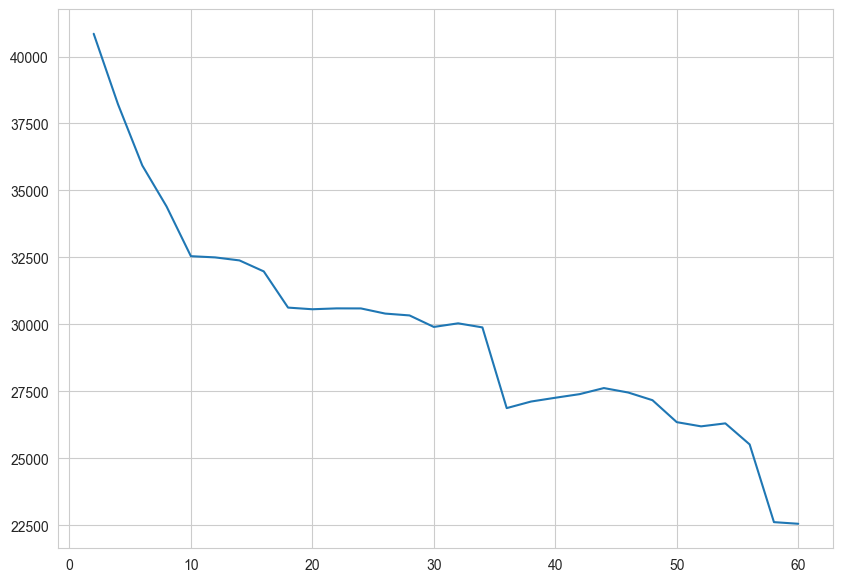

In [72]:
pd.Series(k_score, index=range(2,62,2)).plot(figsize=(10,7))

In [73]:
pd.DataFrame(k_score, index=range(2,62,2))

,0
2,40848.767952
4,38218.045010
6,35932.702799
8,34400.430155
10,32546.344139
12,32500.751230
14,32388.276514
16,31978.086995
18,30626.758250
20,30565.098266


In [74]:
''' Tendo como base a relação N_Features vs Performance escolhi manter o modelo com 30 features.'''

Selector = SelectKBest(score_func=chi2, k="all")
Selector.fit(X_train, y_train)

Features_KBest = list(X_test.iloc[:,Selector.get_support()])

In [75]:
X_train, X_test = X_train[Features_KBest], X_test[Features_KBest]
X = X[Features_KBest]

#### Artefato de Deployment

- O artefato de deployment é uma função que leva todas as transformações e tratamentos realizados para que o mesmo seja aplicado no dataset de teste ou quando o modelo estiver em produção, deixando assim os dados no formato correto para que seja aplicado o predict do modelo.

In [79]:
def artefato_deployment(df):
    
    df.drop(columns=['Id'], inplace=True)

    print('Iniciando tratamento de valores nulos.')

    if df['LotFrontage'].isnull().sum() > 0:
        df['LotFrontage'].fillna(70.04, inplace=True)


    if df['Alley'].isnull().sum() >0:
        df['Alley'].fillna('None', inplace= True)

    if df['MasVnrType'].isnull().sum() >0:
        df['MasVnrType'].fillna('None', inplace=True)

    if df['MasVnrArea'].isnull().sum() >0:
        df['MasVnrArea'].fillna(0, inplace=True)
    
    if df['BsmtQual'].isnull().sum() >0:
        df['BsmtQual'].fillna(0, inplace=True)

    if df['BsmtCond'].isnull().sum() >0:
        df['BsmtCond'].fillna(0, inplace=True)

    if df['BsmtExposure'].isnull().sum() >0:
        df['BsmtExposure'].fillna(0, inplace=True)

    if df['BsmtFinType1'].isnull().sum() >0:
        df['BsmtFinType1'].fillna(0, inplace=True)
        
    if df['BsmtFinType2'].isnull().sum() >0:
        df['BsmtFinType1'].fillna(0, inplace=True)

    if df['Electrical'].isnull().sum() >0:
        df['Electrical'].fillna('SBrkr', inplace=True)
        
    if df['FireplaceQu'].isnull().sum() > 0:
        df['FireplaceQu'].fillna('None', inplace=True)

    if df['GarageType'].isnull().sum() > 0:
        df['GarageType'].fillna('None', inplace=True)

    if df['GarageYrBlt'].isnull().sum() > 0:
        df['GarageYrBlt'].fillna('None', inplace=True)

    if df['GarageFinish'].isnull().sum() > 0:
        df['GarageFinish'].fillna('None', inplace=True)

    if df['GarageQual'].isnull().sum() > 0:
        df['GarageQual'].fillna('None', inplace=True)

    if df['GarageCond'].isnull().sum() > 0:
        df['GarageCond'].fillna('None', inplace=True)
    
    if df['PoolQC'].isnull().sum() > 0:
        df['PoolQC'].fillna('None', inplace=True)

    if df['Fence'].isnull().sum() > 0:
        df['Fence'].fillna('None', inplace=True)

    if df['MiscFeature'].isnull().sum() > 0:
        df['MiscFeature'].fillna('None', inplace=True)

    df.fillna(0, inplace=True)

    print('Tratamento de Nulos finalizados.')


    df.drop(columns=['GarageYrBlt', '1stFlrSF', '2ndFlrSF', 'MiscFeature' , 'PoolQC' , 'Heating' , 'Street' , 'Utilities' , 'RoofMatl' , 'Condition2', 'ScreenPorch', '3SsnPorch', 'PoolArea', 'MiscVal', 'BsmtHalfBath', 'LowQualFinSF'], inplace= True)

    print('Iniciando a normalização dos dados')

    l1_transf = ['LotArea', 'BsmtFinSF1', 'BsmtUnfSF',  'KitchenAbvGr', 'GarageCars']

    log2_tranf = ['MSSubClass', 'OverallCond', 'MasVnrArea', 'BsmtFinSF2', 'GrLivArea', 'BsmtFullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']

    col_categ_f = ['MSZoning', 'Alley', 'LotShape',
                   'LandContour', 'LotConfig', 'LandSlope', 
                   'Neighborhood','Condition1','BldgType',
                   'HouseStyle', 'RoofStyle',
                   'Exterior1st','Exterior2nd','MasVnrType',
                   'ExterQual','ExterCond','Foundation',
                   'BsmtQual','BsmtCond','BsmtExposure',
                   'BsmtFinType1', 'BsmtFinType2',
                   'HeatingQC', 'CentralAir', 'Electrical',
                   'KitchenQual', 'Functional','FireplaceQu',
                   'GarageType','GarageFinish',
                   'GarageQual','GarageCond','PavedDrive',
                   'Fence', 'SaleType', 'SaleCondition']

    df[log2_tranf] = df[log2_tranf] + 1
    df[log2_tranf] = np.log2(df[log2_tranf])

    
    df[l1_transf] = normalizer.fit_transform(df[l1_transf])
    

    for coluna in col_categ_f:
        df[coluna] = df[coluna].astype(str)

    print('Normalização dos dados finalizada.')

    print('Realizando o Feature Select')

    col_select = ['MSSubClass',
                    'MSZoning',
                    'LotFrontage',
                    'LotArea',
                    'Alley',
                    'LotShape',
                    'LandContour',
                    'LotConfig',
                    'LandSlope',
                    'Neighborhood',
                    'Condition1',
                    'BldgType',
                    'HouseStyle',
                    'OverallQual',
                    'OverallCond',
                    'YearBuilt',
                    'YearRemodAdd',
                    'RoofStyle',
                    'Exterior1st',
                    'Exterior2nd',
                    'MasVnrType',
                    'MasVnrArea',
                    'ExterQual',
                    'ExterCond',
                    'Foundation',
                    'BsmtQual',
                    'BsmtCond',
                    'BsmtExposure',
                    'BsmtFinType1',
                    'BsmtFinSF1',
                    'BsmtFinType2',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'HeatingQC',
                    'CentralAir',
                    'Electrical',
                    'GrLivArea',
                    'BsmtFullBath',
                    'FullBath',
                    'HalfBath',
                    'BedroomAbvGr',
                    'KitchenAbvGr',
                    'KitchenQual',
                    'TotRmsAbvGrd',
                    'Functional',
                    'Fireplaces',
                    'FireplaceQu',
                    'GarageType',
                    'GarageFinish',
                    'GarageCars',
                    'GarageArea',
                    'GarageQual',
                    'GarageCond',
                    'PavedDrive',
                    'WoodDeckSF',
                    'OpenPorchSF',
                    'EnclosedPorch',
                    'Fence',
                    'MoSold',
                    'YrSold',
                    'SaleType',
                    'SaleCondition']
    
    df.drop(df.columns.difference(col_select), axis=1, inplace=True)
    
    print('Feature Select finalizado.')

    print('Pré processamento dos dados finalizado')


In [81]:
artefato_deployment(test)

test[col_categ_new] = encoder.transform(test[col_categ_new])

Iniciando tratamento de valores nulos.
Tratamento de Nulos finalizados.
Iniciando a normalização dos dados
Normalização dos dados finalizada.
Realizando o Feature Select
Feature Select finalizado.
Pré processamento dos dados finalizado


#### 5.3 Função para Cross Validation

In [84]:
def cv_reg(modelo, Resultado):
    for repet in range(15):
        print('Repetição: ', repet)
        kf1 = KFold(4, shuffle=True, random_state=repet)

        for linhas_treino, linhas_valid in kf1.split(X = X, y=y):
            print("Treino", linhas_treino.shape[0]) 
            print("Validação", linhas_valid.shape[0])
        

            X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
            y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

            modelo

            print('Repetição:',repet)
            
            modelo.fit(X_treino, y_treino)
            p = modelo.predict(X_valid)
            mse = mean_squared_error(y_valid, p)
            print('RMSE:', np.sqrt(mse))
            Resultado.append(mean_squared_error(y_valid, p))
            
            print()

#### 5.4 Modelo XGBoost

In [85]:
def treinar_modelo(params):
    
    learning_rate = params[0]
    max_depth = params[1]
    min_child_weight = params[2]
    gamma = params[3]
    subsample = params[4]
    colsample_bytree = params[5]
    n_estimators = params[6]

    
    print(params, '\n')
    

    XGB_Model = XGBRegressor(learning_rate=learning_rate,
                                n_estimators=n_estimators,
                                max_depth=max_depth,
                                min_child_weight=min_child_weight,
                                gamma=gamma,
                                subsample=subsample,
                                colsample_bytree=colsample_bytree,
                                objective = 'reg:squarederror',
                                random_state=42)

    XGB_Model.fit(X_train, y_train)

    p = XGB_Model.predict(X_test)

    return mean_squared_error(y_test, p)


space = [(0.01, 0.1), # learning_rate
         (2, 30), # max_depth
         (0, 3), # min_child_weight 
         (0.1, 0.9), # gamma 
         (0.1, 0.8), # subsample
         (0.1, 1), # colsample_bytree
         (500, 2000)] # n_estimators 

XGB_Bay = gp_minimize(treinar_modelo, space, n_calls=50, random_state=42, verbose = 0)

[0.08168886881742098, 7, 2, 0.5774801263571897, 0.4120829269975139, 0.18997742423620262, 1189] 

[0.04003377500251198, 6, 2, 0.14512926322168024, 0.6053991405867775, 0.9446974381141754, 501] 

[0.0992990403362096, 19, 2, 0.10565304417577392, 0.11614369752899104, 0.5722971942325503, 1100] 

[0.014199909689225389, 29, 1, 0.17248514762625666, 0.5328702065331612, 0.4442157921404466, 1975] 

[0.05200866039231821, 26, 2, 0.4603994015756345, 0.10928547281190658, 0.9479815801163677, 1345] 

[0.04468748522859246, 2, 1, 0.2928203728208094, 0.5782844631778209, 0.6489969920043589, 1750] 

[0.025602818815699493, 13, 1, 0.7042891282541222, 0.3976091121438714, 0.28714749658137, 1352] 

[0.012818196321000274, 26, 1, 0.41612018880145163, 0.7486612060556561, 0.7545447962707789, 990] 

[0.06133995769648597, 17, 3, 0.7756270789425214, 0.6231240770961667, 0.5857229191501719, 1380] 

[0.09687297765377244, 19, 1, 0.33701880456326594, 0.21568685734410178, 0.11407276606707455, 1135] 

[0.07716512685154696, 5, 

In [86]:
print('Os parâmetros escolhidos pelo Bayesian Optimization foram:')
print()
print('Learning Rate =',XGB_Bay.x[0])
print('Max Depth =',XGB_Bay.x[1])
print('Min Child Weight =',XGB_Bay.x[2])
print('Gamma =',XGB_Bay.x[3])
print('Subsample =',XGB_Bay.x[4])
print('Colsample_bytree =',XGB_Bay.x[5])
print('N Estimators =',XGB_Bay.x[6])

Os parâmetros escolhidos pelo Bayesian Optimization foram:

Learning Rate = 0.01
Max Depth = 4
Min Child Weight = 0
Gamma = 0.5763255638805704
Subsample = 0.1
Colsample_bytree = 0.4960070328514471
N Estimators = 2000


In [87]:
Resultado_XGB = []

XGB_Model = XGBRegressor(learning_rate=XGB_Bay.x[0],
                        max_depth=XGB_Bay.x[1],
                        min_child_weight=XGB_Bay.x[2],
                        gamma=XGB_Bay.x[3],
                        subsample=XGB_Bay.x[4],
                        colsample_bytree=XGB_Bay.x[5],
                        n_estimators=XGB_Bay.x[6],
                        objective='reg:squarederror',
                        random_state=42)

In [88]:
cv_reg(XGB_Model, Resultado_XGB)

Repetição:  0
Treino 985
Validação 329
Repetição: 0
RMSE: 17315.77993923246

Treino 985
Validação 329
Repetição: 0
RMSE: 17917.538852485683

Treino 986
Validação 328
Repetição: 0
RMSE: 20371.643538667537

Treino 986
Validação 328
Repetição: 0
RMSE: 18172.928268898162

Repetição:  1
Treino 985
Validação 329
Repetição: 1
RMSE: 19557.15542192911

Treino 985
Validação 329
Repetição: 1
RMSE: 18143.903803673806

Treino 986
Validação 328
Repetição: 1
RMSE: 18881.094649430474

Treino 986
Validação 328
Repetição: 1
RMSE: 17451.616151702787

Repetição:  2
Treino 985
Validação 329
Repetição: 2
RMSE: 20397.051662974874

Treino 985
Validação 329
Repetição: 2
RMSE: 18851.692056446787

Treino 986
Validação 328
Repetição: 2
RMSE: 17856.197347684032

Treino 986
Validação 328
Repetição: 2
RMSE: 17671.97247651208

Repetição:  3
Treino 985
Validação 329
Repetição: 3
RMSE: 20997.07846756143

Treino 985
Validação 329
Repetição: 3
RMSE: 17740.175318956975

Treino 986
Validação 328
Repetição: 3
RMSE: 19594.70

In [89]:
print("O modelo XGBoost teve o RMSE de: {:.4f} e desvio padrão de:{:.4f}".format(np.sqrt(Resultado_XGB).mean(), np.sqrt(Resultado_XGB).std()))

O modelo XGBoost teve o RMSE de: 18586.9824 e desvio padrão de:1255.1942


#### 5.5 Modelo de Gradient Boosting

In [54]:
def treinar_modelo(params):
    
    learning_rate = params[0]
    n_estimators = params[1]
    subsample = params[2]
    min_weight_fraction_leaf = params[3]
    max_depth = params[4]
    max_features = params[5]
    
    print(params, '\n')
    

    GB_Model = GradientBoostingRegressor(learning_rate=learning_rate,
                                         n_estimators=n_estimators,
                                         subsample=subsample,
                                         min_weight_fraction_leaf=min_weight_fraction_leaf,
                                         max_depth=max_depth,
                                         max_features=max_features,
                                         criterion = 'friedman_mse',
                                         random_state=42)

    GB_Model.fit(X_train, y_train)

    p = GB_Model.predict(X_test)

    return mean_squared_error(y_test, p)


space = [(0.01, 0.1), # learning_rate
         (500, 3000), # n_estimators
         (0.1, 0.8), # subsample 
         (0.1, 0.5), # min_weight_fraction_leaf 
         (3, 35), # max_depth
         ('auto', 'sqrt', 'log2')] # max_features


GB_Bay = gp_minimize(treinar_modelo, space, n_calls=50, random_state=42, verbose = 0)

[0.08168886881742098, 959, 0.6457837001909387, 0.33874006317859484, 17, 'auto'] 

[0.051332400276928064, 1334, 0.2000067725453586, 0.36035538917954124, 5, 'log2'] 

[0.09446974381141754, 502, 0.7945480915038524, 0.34699260385108666, 23, 'auto'] 

[0.012075618253727419, 1812, 0.37990268020067897, 0.11866626528544619, 34, 'auto'] 

[0.018154579107953872, 2046, 0.367723393887014, 0.49329235432271534, 18, 'sqrt'] 

[0.0712276784729002, 1626, 0.10928547281190658, 0.4768807022739412, 21, 'log2'] 

[0.011436962699819277, 1077, 0.2687178262182083, 0.3733054075301834, 23, 'sqrt'] 

[0.025602818815699493, 1478, 0.22756526145164366, 0.4021445641270611, 17, 'auto'] 

[0.06109302950379925, 578, 0.6895993422164991, 0.2799016533479063, 16, 'sqrt'] 

[0.0754544796270779, 1316, 0.49931078208377966, 0.30833370401032956, 34, 'sqrt'] 

[0.1, 500, 0.1, 0.1, 3, 'auto'] 

[0.01254539706964263, 1880, 0.3613737705490355, 0.11552295458479848, 35, 'auto'] 

[0.1, 3000, 0.8, 0.1, 35, 'sqrt'] 

[0.0489483200633459

In [55]:
print('Os parâmetros escolhidos pelo Bayesian Optimization foram:')
print()
print('Learning Rate =',GB_Bay.x[0])
print('N Estimators =',GB_Bay.x[1])
print('Subsample =',GB_Bay.x[2])
print('Min_weight_fraction_leaf =',GB_Bay.x[3])
print('Max_depth =',GB_Bay.x[4])
print('Max_Features =',GB_Bay.x[5])

Os parâmetros escolhidos pelo Bayesian Optimization foram:

Learning Rate = 0.01
N Estimators = 2384
Subsample = 0.1
Min_weight_fraction_leaf = 0.1
Max_depth = 35
Max_Features = auto


In [56]:
Resultado_GB = []

GB_Model = GradientBoostingRegressor(learning_rate=GB_Bay.x[0],
                                     n_estimators=GB_Bay.x[1],
                                     subsample=GB_Bay.x[2],
                                     min_weight_fraction_leaf=GB_Bay.x[3],
                                     max_depth=GB_Bay.x[4],
                                     max_features=GB_Bay.x[5],
                                     criterion = 'friedman_mse',
                                     random_state=42)

In [57]:
cv_reg(GB_Model, Resultado_GB)

Repetição:  0
Treino 985
Validação 329
Repetição: 0
RMSE: 19176.441979133513

Treino 985
Validação 329
Repetição: 0
RMSE: 16919.377536484444

Treino 986
Validação 328
Repetição: 0
RMSE: 22154.947939626458

Treino 986
Validação 328
Repetição: 0
RMSE: 19656.23735062584

Repetição:  1
Treino 985
Validação 329
Repetição: 1
RMSE: 19555.85377244427

Treino 985
Validação 329
Repetição: 1
RMSE: 18350.101929105207

Treino 986
Validação 328
Repetição: 1
RMSE: 20411.113383638552

Treino 986
Validação 328
Repetição: 1
RMSE: 19395.986861409496

Repetição:  2
Treino 985
Validação 329
Repetição: 2
RMSE: 21503.100446541277

Treino 985
Validação 329
Repetição: 2
RMSE: 18831.887772452767

Treino 986
Validação 328
Repetição: 2
RMSE: 20760.615959470688

Treino 986
Validação 328
Repetição: 2
RMSE: 18198.177704572077

Repetição:  3
Treino 985
Validação 329
Repetição: 3
RMSE: 20689.11870235017

Treino 985
Validação 329
Repetição: 3
RMSE: 20484.86183357889

Treino 986
Validação 328
Repetição: 3
RMSE: 20030.09

In [58]:
print("O modelo Gradient Boosting teve o RMSE de: {:.4f} e desvio padrão de:{:.4f}".format(np.sqrt(Resultado_GB).mean(), np.sqrt(Resultado_GB).std()))

O modelo Gradient Boosting teve o RMSE de: 19522.3338 e desvio padrão de:1133.1720


#### 5.6 Modelo Random Forest

In [59]:
def treinar_modelo(params):
    
    n_estimators = params[0]
    max_depth = params[1]
    max_features = params[2]
    min_samples_leaf = params[3]
    min_samples_split = params[4]

    
    print(params, '\n')
    

    RF_Model = RandomForestRegressor(n_estimators = n_estimators,
                                     max_depth = max_depth,
                                     max_features = max_features,
                                     min_samples_leaf = min_samples_leaf,
                                     min_samples_split = min_samples_split,
                                     random_state=42)

    RF_Model.fit(X_train, y_train)

    p = RF_Model.predict(X_test)

    return mean_squared_error(y_test, p)


space = [(500, 2000), # n_estimators
         (2, 30), # max_depth
         (0.1, 0.9), # max_features 
         (1, 10), # min_samples_leaf 
         (1, 15)] # min_samples_split

RF_Bay = gp_minimize(treinar_modelo, space, n_calls=50, random_state=42, verbose = 0)

[1695, 7, 0.7237528002182156, 6, 7] 

[650, 15, 0.36696688891121754, 2, 10] 

[585, 22, 0.8508421672126003, 1, 15] 

[1426, 19, 0.10565304417577392, 1, 8] 

[1100, 3, 0.8790044150731675, 3, 2] 

[1428, 13, 0.8865847086454307, 5, 13] 

[1520, 15, 0.11061196892789324, 9, 9] 

[1078, 2, 0.2847150604977192, 3, 11] 

[1415, 25, 0.2386917228062177, 5, 4] 

[1633, 14, 0.2663533302945511, 6, 1] 

[648, 15, 0.38367770080249697, 2, 10] 

[581, 5, 0.9, 3, 1] 

[636, 16, 0.5364035780112262, 2, 11] 

[1386, 9, 0.9, 10, 15] 

[862, 16, 0.6063916545878698, 1, 11] 

[694, 15, 0.42621287519314677, 2, 10] 

[500, 11, 0.9, 1, 1] 

[500, 30, 0.9, 1, 1] 

[2000, 30, 0.9, 10, 15] 

[737, 15, 0.47379754533196394, 2, 9] 

[786, 15, 0.4992526347146131, 2, 8] 

[846, 15, 0.5366896376336916, 2, 5] 

[964, 15, 0.5930219025494466, 2, 1] 

[1054, 15, 0.6199270102627346, 2, 1] 

[811, 15, 0.5357680355115336, 2, 1] 

[853, 15, 0.5429539134455538, 2, 1] 

[861, 15, 0.5422242895237089, 2, 1] 

[879, 15, 0.5725467560883

In [60]:
print('Os parâmetros escolhidos pelo Bayesian Optimization foram:')
print()
print('N Estimators =',RF_Bay.x[0])
print('Max_depth =',RF_Bay.x[1])
print('Max_Features =',RF_Bay.x[2])
print('Min_samples_leaf =',RF_Bay.x[3])
print('min_samples_split =',RF_Bay.x[4])

Os parâmetros escolhidos pelo Bayesian Optimization foram:

N Estimators = 1183
Max_depth = 15
Max_Features = 0.5343946537221363
Min_samples_leaf = 2
min_samples_split = 1


In [61]:
Resultado_RF = []

RF_Model = RandomForestRegressor(n_estimators=RF_Bay.x[0],
                                 max_depth=RF_Bay.x[1],
                                 max_features=RF_Bay.x[2],
                                 min_samples_leaf=RF_Bay.x[3],
                                 min_samples_split=RF_Bay.x[4],
                                 random_state=42)

In [62]:
cv_reg(RF_Model, Resultado_RF)

Repetição:  0
Treino 985
Validação 329
Repetição: 0
RMSE: 20869.937350540178

Treino 985
Validação 329
Repetição: 0
RMSE: 17824.8721134703

Treino 986
Validação 328
Repetição: 0
RMSE: 24197.940882600316

Treino 986
Validação 328
Repetição: 0
RMSE: 21655.07070474564

Repetição:  1
Treino 985
Validação 329
Repetição: 1
RMSE: 21807.802059850066

Treino 985
Validação 329
Repetição: 1
RMSE: 20971.55414768327

Treino 986
Validação 328
Repetição: 1
RMSE: 22777.34758333111

Treino 986
Validação 328
Repetição: 1
RMSE: 19813.17463607403

Repetição:  2
Treino 985
Validação 329
Repetição: 2
RMSE: 23719.85522541606

Treino 985
Validação 329
Repetição: 2
RMSE: 20202.050468970352

Treino 986
Validação 328
Repetição: 2
RMSE: 21874.718843122468

Treino 986
Validação 328
Repetição: 2
RMSE: 19089.54692628302

Repetição:  3
Treino 985
Validação 329
Repetição: 3
RMSE: 22408.0502122048

Treino 985
Validação 329
Repetição: 3
RMSE: 22523.700988100987

Treino 986
Validação 328
Repetição: 3
RMSE: 22176.13808341

In [63]:
print("O modelo Random Forest teve o RMSE de: {:.4f} e desvio padrão de:{:.4f}".format(np.sqrt(Resultado_RF).mean(), np.sqrt(Resultado_RF).std()))

O modelo Random Forest teve o RMSE de: 21306.5018 e desvio padrão de:1405.7382


#### 5.7 Modelo LightGBM

In [64]:
def treinar_modelo(params):
    
    n_estimators = params[0]
    max_depth = params[1]
    num_leaves = params[2]
    learning_rate = params[3]
    min_child_samples = params[4]
    subsample = params[5]

    
    print(params, '\n')
    

    LGBM_Model = LGBMRegressor(n_estimators = n_estimators,
                                max_depth = max_depth,
                                num_leaves = num_leaves,
                                learning_rate = learning_rate,
                                min_child_samples = min_child_samples,
                                subsample = subsample,
                                random_state=42)

    LGBM_Model.fit(X_train, y_train)

    p = LGBM_Model.predict(X_test)

    return mean_squared_error(y_test, p)


space = [(500, 2500), # n_estimators
         (3, 30), # max_depth
         (20, 300), # num_leaves 
         (0.01, 0.3), # learning_rate 
         (5, 150), #min_child_samples
         (0.1, 1)] # subsample

LGBM_Bay = gp_minimize(treinar_modelo, space, n_calls=50, random_state=42, verbose = 0)

[2093, 8, 238, 0.18308654580448125, 70, 0.18997742423620262] 

[1418, 12, 60, 0.19875765715516736, 13, 0.7497988950401424] 

[2377, 3, 298, 0.1890696377920378, 94, 0.10635967469774567] 

[546, 17, 132, 0.023533042331948473, 146, 0.3094942063872739] 

[681, 20, 127, 0.2951369568839686, 73, 0.8739463660626887] 

[1861, 15, 24, 0.2832385091486074, 87, 0.4468748522859246] 

[532, 9, 87, 0.20814642045938292, 93, 0.8498754205625481] 

[847, 14, 71, 0.22905480899211927, 67, 0.28714749658137] 

[1635, 4, 256, 0.14042869867723207, 62, 0.9339929792144149] 

[1955, 12, 180, 0.1610419354074889, 144, 0.8600804638103364] 

[500, 3, 300, 0.01, 69, 1.0] 

[1928, 8, 300, 0.016367298262265163, 67, 0.2936168572289047] 

[2500, 3, 300, 0.01, 52, 0.1] 

[2500, 30, 20, 0.01, 62, 0.1] 

[500, 30, 300, 0.01, 57, 0.18686473007253218] 

[2094, 3, 300, 0.01, 59, 0.1] 

[2500, 30, 300, 0.01, 63, 0.1] 

[2500, 30, 300, 0.01, 61, 0.36259823183672235] 

[2500, 30, 300, 0.01, 64, 0.1] 

[2500, 3, 20, 0.01, 64, 0.1] 


In [65]:
print('Os parâmetros escolhidos pelo Bayesian Optimization foram:')
print()
print('N Estimators =',LGBM_Bay.x[0])
print('Max_depth =',LGBM_Bay.x[1])
print('Num_Leaves =',LGBM_Bay.x[2])
print('Learning Rate =',LGBM_Bay.x[3])
print('min_child_samples =',LGBM_Bay.x[4])
print('Subsample =',LGBM_Bay.x[5])

Os parâmetros escolhidos pelo Bayesian Optimization foram:

N Estimators = 1176
Max_depth = 30
Num_Leaves = 300
Learning Rate = 0.01
min_child_samples = 24
Subsample = 1.0


In [66]:
Resultado_LGBM = []

LGBM_Model = LGBMRegressor(n_estimators=LGBM_Bay.x[0],
                            max_depth=LGBM_Bay.x[1],
                            num_leaves=LGBM_Bay.x[2],
                            learning_rate=LGBM_Bay.x[3],
                            min_child_samples=LGBM_Bay.x[4],
                            subsample=LGBM_Bay.x[5],
                            random_state=42)

In [67]:
cv_reg(LGBM_Model, Resultado_LGBM)

Repetição:  0
Treino 985
Validação 329
Repetição: 0
RMSE: 20626.811487977026

Treino 985
Validação 329
Repetição: 0
RMSE: 18416.05581260522

Treino 986
Validação 328
Repetição: 0
RMSE: 23495.977299391845

Treino 986
Validação 328
Repetição: 0
RMSE: 20302.425597263253

Repetição:  1
Treino 985
Validação 329
Repetição: 1
RMSE: 20894.762775412273

Treino 985
Validação 329
Repetição: 1
RMSE: 19323.567693978137

Treino 986
Validação 328
Repetição: 1
RMSE: 21948.93620583987

Treino 986
Validação 328
Repetição: 1
RMSE: 20033.53211185904

Repetição:  2
Treino 985
Validação 329
Repetição: 2
RMSE: 23173.038064902237

Treino 985
Validação 329
Repetição: 2
RMSE: 19330.271415145104

Treino 986
Validação 328
Repetição: 2
RMSE: 21183.95320942598

Treino 986
Validação 328
Repetição: 2
RMSE: 19990.176469315546

Repetição:  3
Treino 985
Validação 329
Repetição: 3
RMSE: 22746.54793640185

Treino 985
Validação 329
Repetição: 3
RMSE: 21288.778123041306

Treino 986
Validação 328
Repetição: 3
RMSE: 21773.362

In [68]:
print("O modelo Random Forest teve o RMSE de: {:.4f} e desvio padrão de:{:.4f}".format(np.sqrt(Resultado_LGBM).mean(), np.sqrt(Resultado_LGBM).std()))

O modelo Random Forest teve o RMSE de: 20783.0326 e desvio padrão de:1224.9133


### **Deployment**

In [90]:
y = XGB_Model.predict(test)

In [91]:
submission_df = pd.DataFrame({'Id': Id, 'SalePrice': y})
submission_df.to_csv('submission.csv', index=False)


In [92]:
encoders = {'Normalizer': normalizer,
            'Target_encod': encoder}

joblib.dump(XGB_Model, 'Model_Deploy.pkl')
joblib.dump(encoders, 'Encoders.pkl')

['Encoders.pkl']